# LABORATORIO1:  Regresión Lineal Multiple

## Regresión lineal múltiple

Se utiliza la regresion lineal multiple para predecir el precio de barcos de motor y de velo. El dataset `/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt` contiene las siguientes características (features).
Columna1 - X1 : Año de fabricación del barco
Columna2 - X2: Largo del barco en pies
Columna3 - X3: Ancho del barco en pies
Columna4 - X4: Cantidad de motores del barco
Columna5 - X5: Potencia del barco en HP
Columna6 - y: Precio del Barco en Dólares

### 1. Bibliotecas a utilizar en las regresiones

In [219]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 2. Se otorga permisos de acceso a la carpeta de Drive para leer el dataset

In [220]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 3. Desde el directorio del Drive se carga el dataset y se imprimen 15 ejemplos para verificar que los datos estén en orden.

In [221]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'Boats_Cleaned_dataset.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=',')
X = data[:, :5]
y = data[:, 5]
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'y'))
print('-'*126)
for i in range(15):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], y[i]))

18052
  X[:,0] X[:, 1]   X[:, 2] X[:, 3] X[:, 4]         y
------------------------------------------------------------------------------------------------------------------------------
    1992      21       8       1     150     16500
    2018      40      11       2     800    539000
    2020      18       7       1      75     26995
    2015      32      10       2     600    169995
    1994      44      15       2     700    109900
    2019      43      14       2     800    625000
    2019      46      14       2    1100    949000
    2019      50      20       2    1340   1349000
    2009     103      23       2    3650   3299000
    1971      42      14       2     840     59500
    1979      43      14       2     900     79500
    1986      30      11       1       0     25500
    2019      24       8       1     200     44507
    2000      55      16       2       0    299000
    1989      30      11       1      18     31000


## 4. Normalización de las características
En la impresión anterior se observa que los datos tienen diferentes magnitudes.
Con la normalización se va a transformar cada una de las características para que los datos esten en una sola escala. De esta forma se podrá converger más rápidamente.
Se aplica la ecuación: X_norm = (X -mu) / sigma

In [222]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## 5. Se va a imprimir los valores normalizados
Se imprime los valores normalizados de las características.
Asimismo los valores medios y la desviación estandar utilizados para la normalización de datos.

In [223]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.992e+03 2.100e+01 8.500e+00 1.000e+00 1.500e+02]
 [2.018e+03 4.000e+01 1.100e+01 2.000e+00 8.000e+02]
 [2.020e+03 1.800e+01 7.420e+00 1.000e+00 7.500e+01]
 ...
 [1.973e+03 2.900e+01 1.613e+01 1.000e+00 0.000e+00]
 [2.013e+03 1.933e+01 8.000e+00 1.000e+00 0.000e+00]
 [2.002e+03 2.658e+01 9.420e+00 1.000e+00 2.200e+02]]
Media calculada: [2.01341962e+03 2.37151800e+01 1.63144233e+01 1.11976512e+00
 1.12867760e+02]
Desviación estandar calculada: [ 10.26290881  13.94435393  28.79966571   0.36515857 286.14974242]
[[-2.08709066 -0.19471537 -0.27133729 -0.32798114  0.12976507]
 [ 0.44630416  1.16784328 -0.18453073  2.41055515  2.40130302]
 [ 0.64118069 -0.40985621 -0.30883773 -0.32798114 -0.13233547]
 ...
 [-3.93841764  0.37899353 -0.00640366 -0.32798114 -0.394436  ]
 [-0.04088715 -0.3144771  -0.28869861 -0.32798114 -0.394436  ]
 [-1.11270803  0.20544659 -0.23939248 -0.32798114  0.37439223]]


## 6. Después de normalizar, se agrega la característica X0 = 1 para todos los ejemplos.
Se imprime para verificar que se agregó X0 como primera característica.

In [224]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [225]:
print(X)

[[ 1.         -2.08709066 -0.19471537 -0.27133729 -0.32798114  0.12976507]
 [ 1.          0.44630416  1.16784328 -0.18453073  2.41055515  2.40130302]
 [ 1.          0.64118069 -0.40985621 -0.30883773 -0.32798114 -0.13233547]
 ...
 [ 1.         -3.93841764  0.37899353 -0.00640366 -0.32798114 -0.394436  ]
 [ 1.         -0.04088715 -0.3144771  -0.28869861 -0.32798114 -0.394436  ]
 [ 1.         -1.11270803  0.20544659 -0.23939248 -0.32798114  0.37439223]]


## 7. Cálculo de la función de costo J con Regularización



In [226]:
"""
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J
"""
def computeCostMulti(X, y, theta, lambda_reg):
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    h = np.dot(X, theta)

    # Calcular el término de costo sin regularización
    J = (1/(2 * m)) * np.sum(np.square(h - y))

    # Agregar el término de regularización
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))  # Excluye theta_0
    J += reg_term

    return J

## 8. Cálculo de valores de Theta mediante el descenso por el gradiente con Regularización.
Se aplica el descenso por el gradiente con el objetivo de minimizar el valor de J (costo).\
En nuestro caso: J (Theta0, Theta1, Theta2, Theta3, Theta4, Theta5)

In [227]:
"""
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history
"""
def gradientDescentMulti(X, y, theta, alpha, lambda_reg, num_iters):
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizado por el descenso por el gradiente
    theta = theta.copy()

    temp = theta
    temp[0] = 0

    J_history = []

    for i in range(num_iters):
        # Actualiza theta sin regularización
        theta = theta - (alpha / m) * ((np.dot(X, theta) - y).dot(X)) - (alpha * lambda_reg / m) * temp

        # Agrega el término de regularización para j >= 1
        #reg_term = (alpha * lambda_reg / m) * theta[1:]
        #theta[1:] -= reg_term
        #theta -= reg_term

        J_history.append(computeCostMulti(X, y, theta, lambda_reg))

    return theta, J_history

### 9. Selección de lambda_reg y coeficiente de aprendizaje alpha
Se debe tener cuidado en la selección de los valores de Alpha.
-Si Alpha es muy pequeño, el descenso por el gradiente será lento.
-Si Alpha es muy grande, en el descenso por el gradiente puede presentarse el mínimo y falla su propósito de converger a un mínimo global.
#### Gráfico número de iteraciones vs. costo
Se grafica para visualizar cómo varía el costo J en función del número de iteraciones que utilizamos. A mayor número de iteraciones se reduce el valor del costo (Mean squared error).
#### Predicción del valor de y
Para valores dados de las características se predice el valor de y (Precio del Barco) con lo cual concluye la regresión mediante el descenso por el gradiente.

Theta calculado por el descenso por el gradiente: [ 64589.9509701   23336.66592533  33886.54480246   9921.34861367
    243.66147486 108467.03121042]
El precio predecido del barco (usando el descenso por el gradiente con regularización): $20589


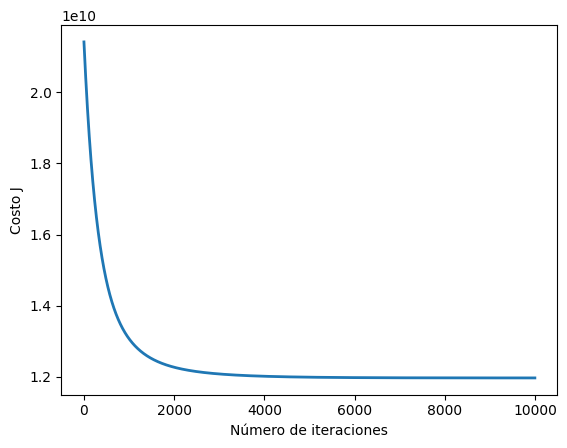

In [231]:
"""
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001    #alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio de un barco donde: Año de fabricación=1992, Largo=21 ft, Ancho=8.5 ft, CantidadMotores=1, Potencia=150 HP
X_array = [1, 1992, 21, 8.5, 1, 150]
X_array[1:6] = (X_array[1:6] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido del Barco (usando el descenso por el gradiente): ${:.0f}'.format(price))
"""
# Elegir un valor para lambda_reg (parámetro de regularización)
lambda_reg = 100                                                                #Valor inicial lambda_reg = 0.1
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# Inicializar theta y ejecutar el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, lambda_reg, num_iters)

# Graficar la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

# Mostrar los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio de un barco donde: Año de fabricación=1992, Largo=21 ft, Ancho=8.5 ft, CantidadMotores=1, Potencia=150 HP
X_array = [1, 1992, 21, 8.5, 1, 150]
X_array[1:6] = (X_array[1:6] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido del barco (usando el descenso por el gradiente con regularización): ${:.0f}'.format(price))

In [193]:
X_array = [1, 1992, 23, 9.5, 1, 180]
X_array[1:6] = (X_array[1:6] - mu) / sigma

In [194]:
X_array[1:6]

[-2.087090657139544,
 -0.05128814423484148,
 -0.23661466773391754,
 -0.32798113557411496,
 0.23460527913825205]


### 10. APLICACIÓN DE LA ECUACIÓN DE LA NORMAL CON REGULARIZACIÓN

Se utiliza para calcular rapidamente el modelo de una regresion lineal.

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Para aplicar ésta ecuación se debe cumplir 3 requisitos:
1. El número de ejemplos debe ser mayor al número de características:
m > n
2.Que las características no estén repetidas
3. La cantidad de datos no debe ser grande:  m < 10000. Ésto por la capacidad de cómputo. En nuestro caso se ha probado que sí funciona para los cerca de 18000 ejemplos.

In [195]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=',')
X = data[:, :5]
y = data[:, 5]
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

18052


In [196]:
"""
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta
"""
def normalEqn(X, y, lambda_reg):
    # Construye la matriz de regularización L
    L = np.eye(X.shape[1])
    L[0, 0] = 0  # No regularizar el parámetro de intercepción theta0

    # Calcula theta usando la ecuación normal regularizada
    theta = np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_reg * L), np.dot(X.T, y))

    return theta

### 11. Predicción del valor de y (Costo del Barco)

In [197]:
# Elegir un valor para lambda_reg (parámetro de regularización)
lambda_reg = 5000
# Calcula los parametros con la ecuación de la normal

theta = normalEqn(X, y, lambda_reg);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio de un barco donde: Año de fabricación=1992, Largo=21 ft, Ancho=8.5 ft, CantidadMotores=1, Potencia=150 HP

X_array = [1, 1992, 21, 8.5, 1, 150]
price = np.dot(X_array, theta)

print('Precio predecido del Barco (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-4.58283506e+06  2.25595080e+03  2.41287792e+03  3.46203224e+02
 -6.48725252e+02  3.81940763e+02]
Precio predecido del Barco (usando la ecuación de la normal): $21274


#### Se observa que el valor predecido del Costo del Barco es correcto.

# LABORATORIO1: Regresión Polinomial

### 1. Normalización de Características

In [198]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'Boats_Cleaned_dataset(1)'), delimiter=',')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'Boats_Cleaned_dataset(1)'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=",")
#print(data)
X = data[:, :5]
y = data[:, 5]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format(X, y))
#print('-'*126)
for i in range(20):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], y[i]))

    1992      21       8       1     150     16500
    2018      40      11       2     800    539000
    2020      18       7       1      75     26995
    2015      32      10       2     600    169995
    1994      44      15       2     700    109900
    2019      43      14       2     800    625000
    2019      46      14       2    1100    949000
    2019      50      20       2    1340   1349000
    2009     103      23       2    3650   3299000
    1971      42      14       2     840     59500
    1979      43      14       2     900     79500
    1986      30      11       1       0     25500
    2019      24       8       1     200     44507
    2000      55      16       2       0    299000
    1989      30      11       1      18     31000
    2017      35      11       2     760    323536
    2019      22       8       1     175     36900
    2019      20       8       1     115     22900
    2000      48      16       2    1320    325000
    1987      54      18       

###Para la regresión polinomail se hará una hipótesis de segundo grado.
Para las 5 Características, la hipóstesis en función de θ y X es:\
hθ(X1,X2,……,X5) = θ0 +  θ1X1 +  θ2X2 +  θ3X3 +  θ4X4 +  θ5X5 +\
θ6(X1^2) +  θ7(X2^2) +  θ8(X3^2) +  θ9(X4^2) +  θ10(X5^2) +\
θ11(X1X2) + θ12(X1X3) + θ13(X1X4) + θ14(X1X5) +\
θ15(X2X3) + θ16(X2X4) + θ17(X2X5) +\
θ18(X3X4) + θ19(X3X5) + \
θ20(X4X5)

###Calculamos los cuadrados: (X1^2), (X2^2), (X3^2), (X4^2) y (X5^2) y concatenamos a las X's.

In [199]:
X = np.concatenate([X, X * X], axis=1)

In [200]:
print(X)

[[1.992000e+03 2.100000e+01 8.500000e+00 ... 7.225000e+01 1.000000e+00
  2.250000e+04]
 [2.018000e+03 4.000000e+01 1.100000e+01 ... 1.210000e+02 4.000000e+00
  6.400000e+05]
 [2.020000e+03 1.800000e+01 7.420000e+00 ... 5.505640e+01 1.000000e+00
  5.625000e+03]
 ...
 [1.973000e+03 2.900000e+01 1.613000e+01 ... 2.601769e+02 1.000000e+00
  0.000000e+00]
 [2.013000e+03 1.933000e+01 8.000000e+00 ... 6.400000e+01 1.000000e+00
  0.000000e+00]
 [2.002000e+03 2.658000e+01 9.420000e+00 ... 8.873640e+01 1.000000e+00
  4.840000e+04]]


###Calculamos las diferentes combinaciones (Xi Xj) de las características

In [201]:
# X es la matriz de características original de tamaño (m, 5)

# Calcula las interacciones entre características
X_interactions = np.empty((X.shape[0], 10))  # 10 nuevas características (interacciones)
X_interactions[:, 0] = X[:, 0] * X[:, 1]   # X1*X2
X_interactions[:, 1] = X[:, 0] * X[:, 2]   # X1*X3
X_interactions[:, 2] = X[:, 0] * X[:, 3]   # X1*X4
X_interactions[:, 3] = X[:, 0] * X[:, 4]   # X1*X5
X_interactions[:, 4] = X[:, 1] * X[:, 2]   # X2*X3
X_interactions[:, 5] = X[:, 1] * X[:, 3]   # X2*X4
X_interactions[:, 6] = X[:, 1] * X[:, 4]   # X2*X5
X_interactions[:, 7] = X[:, 2] * X[:, 3]   # X3*X4
X_interactions[:, 8] = X[:, 2] * X[:, 4]   # X3*X5
X_interactions[:, 9] = X[:, 3] * X[:, 4]   # X4*X5

# Concatena las interacciones con la matriz original X
X = np.concatenate([X, X_interactions], axis=1)

In [202]:
print(X)

[[1.9920e+03 2.1000e+01 8.5000e+00 ... 8.5000e+00 1.2750e+03 1.5000e+02]
 [2.0180e+03 4.0000e+01 1.1000e+01 ... 2.2000e+01 8.8000e+03 1.6000e+03]
 [2.0200e+03 1.8000e+01 7.4200e+00 ... 7.4200e+00 5.5650e+02 7.5000e+01]
 ...
 [1.9730e+03 2.9000e+01 1.6130e+01 ... 1.6130e+01 0.0000e+00 0.0000e+00]
 [2.0130e+03 1.9330e+01 8.0000e+00 ... 8.0000e+00 0.0000e+00 0.0000e+00]
 [2.0020e+03 2.6580e+01 9.4200e+00 ... 9.4200e+00 2.0724e+03 2.2000e+02]]


In [203]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [204]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

###2. Añadir el término de interseccion X0 a X_norm:

In [205]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [206]:
print(X)

[[ 1.         -2.08709066 -0.19471537 ... -0.32113439 -0.00956648
  -0.06388182]
 [ 1.          0.44630416  1.16784328 ...  0.14293117  1.58587967
   2.1557485 ]
 [ 1.          0.64118069 -0.40985621 ... -0.35825963 -0.16190243
  -0.17869029]
 ...
 [ 1.         -3.93841764  0.37899353 ... -0.05885141 -0.27989124
  -0.29349875]
 [ 1.         -0.04088715 -0.3144771  ... -0.338322   -0.27989124
  -0.29349875]
 [ 1.         -1.11270803  0.20544659 ... -0.28950918  0.15949781
   0.04327274]]


### 3. Costo y Descenso por el gradiente con REGULARIZACIÓN

In [207]:
"""
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J
"""
def computeCostMulti(X, y, theta, lambda_reg):
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    h = np.dot(X, theta)

    # Calcular el término de costo sin regularización
    J = (1/(2 * m)) * np.sum(np.square(h - y))

    # Agregar el término de regularización
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))  # Excluye theta_0
    J += reg_term

    return J

In [208]:
"""
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history
"""
def gradientDescentMulti(X, y, theta, alpha, lambda_reg, num_iters):
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizado por el descenso por el gradiente
    theta = theta.copy()

    temp = theta
    temp[0] = 0

    J_history = []

    for i in range(num_iters):
        # Actualiza theta sin regularización
        theta = theta - (alpha / m) * ((np.dot(X, theta) - y).dot(X)) - (alpha * lambda_reg / m) * temp

        # Agrega el término de regularización para j >= 1
        #reg_term = (alpha * lambda_reg / m) * theta[1:]
        #theta[1:] -= reg_term
        #theta -= reg_term

        J_history.append(computeCostMulti(X, y, theta, lambda_reg))

    return theta, J_history

### 4. Seleccionar lambda_reg y coeficiente de aprendizaje alpha

theta calculado por el descenso por el gradiente: [ 64589.9509701   12776.76878995   7963.63330227  -3161.51298889
   3468.87469083 -37008.57046459  13113.25373717 -28737.14249761
  -7836.6917663    4191.77864886  98997.38195035   8300.20890442
  -3077.66604924   5356.23128858 -34596.42468894  11994.83269798
  48700.99622208  74338.01871407   3948.7835791   29098.69673944
 -21438.50492587]
El costo del Barco (usando el descenso por el gradiente) es: $-31218


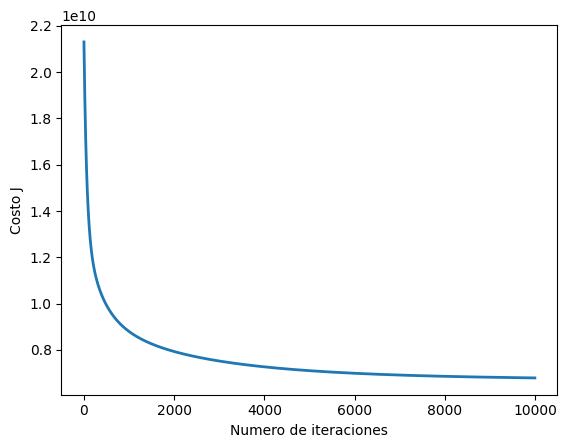

In [209]:
# Elegir un valor para lambda_reg (parámetro de regularización)
lambda_reg = 0.1                                                                #0.1
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001                       #0.001
num_iters = 10000                   #100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(21)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, lambda_reg, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio de un barco donde: Año de fabricación=1992, Largo=21 ft, Ancho=8.5 ft, CantidadMotores=1, Potencia=150 HP
X_array = [1, 1992, 21, 8.5, 1, 150, 3968064, 441, 72.25, 1, 22500, 41832, 16932, 1992, 298800, 178.5, 21, 3150, 8.5, 1275, 150]
X_array[1:21] = (X_array[1:21] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El costo del Barco (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

###Predicción de la hipótesis -> 'y' -> Costo del Barco

In [210]:
X_array = [1, 1992, 21, 8.5, 1, 150, 3968064, 441, 72.25, 1, 22500, 41832, 16932, 1992, 298800, 178.5, 21, 3150, 8.5, 1275, 150]
X_array[1:21] = (X_array[1:21] - mu) / sigma

In [211]:
X_array[1:21]
print(np.dot(X_array, theta))

-31218.11558840767


### 5. Aplicación de la Ecuación de la Normal

In [212]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=",")
X = data[:, :5]
y = data[:, 5]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [213]:
# Calcula las interacciones entre características
X_interactions = np.empty((X.shape[0], 10))  # 10 nuevas características (interacciones)
X_interactions[:, 0] = X[:, 0] * X[:, 1]   # X1*X2
X_interactions[:, 1] = X[:, 0] * X[:, 2]   # X1*X3
X_interactions[:, 2] = X[:, 0] * X[:, 3]   # X1*X4
X_interactions[:, 3] = X[:, 0] * X[:, 4]   # X1*X5
X_interactions[:, 4] = X[:, 1] * X[:, 2]   # X2*X3
X_interactions[:, 5] = X[:, 1] * X[:, 3]   # X2*X4
X_interactions[:, 6] = X[:, 1] * X[:, 4]   # X2*X5
X_interactions[:, 7] = X[:, 2] * X[:, 3]   # X3*X4
X_interactions[:, 8] = X[:, 2] * X[:, 4]   # X3*X5
X_interactions[:, 9] = X[:, 3] * X[:, 4]   # X4*X5

# Concatena las interacciones con la matriz original X
X = np.concatenate([X, X_interactions], axis=1)

In [214]:
print(X)

[[1.9920e+03 2.1000e+01 8.5000e+00 ... 8.5000e+00 1.2750e+03 1.5000e+02]
 [2.0180e+03 4.0000e+01 1.1000e+01 ... 2.2000e+01 8.8000e+03 1.6000e+03]
 [2.0200e+03 1.8000e+01 7.4200e+00 ... 7.4200e+00 5.5650e+02 7.5000e+01]
 ...
 [1.9730e+03 2.9000e+01 1.6130e+01 ... 1.6130e+01 0.0000e+00 0.0000e+00]
 [2.0130e+03 1.9330e+01 8.0000e+00 ... 8.0000e+00 0.0000e+00 0.0000e+00]
 [2.0020e+03 2.6580e+01 9.4200e+00 ... 9.4200e+00 2.0724e+03 2.2000e+02]]


In [215]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [216]:
"""
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta
"""
def normalEqn(X, y, lambda_reg):
    # Construye la matriz de regularización L
    L = np.eye(X.shape[1])
    L[0, 0] = 0  # No regularizar el parámetro de intercepción theta0

    # Calcula theta usando la ecuación normal regularizada
    theta = np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_reg * L), np.dot(X.T, y))

    return theta

In [217]:
# Elegir un valor para lambda_reg (parámetro de regularización)
lambda_reg = 2000
# Calcula los parametros con la ecuación de la normal

theta = normalEqn(X, y, lambda_reg);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 1992, 21, 8.5, 1, 150, 3968064, 441, 72.25, 1, 22500, 41832, 16932, 1992, 298800, 178.5, 21, 3150, 8.5, 1275, 150]
price = np.dot(X_array, theta)

print('Precio del Barco (usando la ecuación de la normal) es: ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 5.11981157e+06 -5.60046987e+03  4.83868956e+01 -2.91681370e+03
 -1.65941092e+02 -3.33898869e+04  1.54133159e+00 -1.99555335e+01
 -2.77818529e-01 -5.15221059e+03  1.00488039e-01 -2.07847679e+00
  2.00824654e+00 -5.84671981e+01  1.65089565e+01  3.85492107e+00
  7.75873507e+03  6.33303093e+00 -9.45716475e+02  1.18890199e+01
 -1.19012905e+02]
Precio del Barco (usando la ecuación de la normal) es: $-28055


####Observación: valor predecido del costo del barco es negativo.
Se analizará nuevamente la regresión polinomial.